In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
data = sns.load_dataset("iris")

In [6]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
data["species"].replace()

In [4]:
data = data.drop(labels="Unnamed: 0",axis=1)
data.head(1)

,subject,attention,solutions,score
0,1,divided,1,2.0


In [5]:
# Unique Features:

In [6]:
for feat in data.columns:
    print(feat," - ")
    print(data[feat].unique(),"\n",len(data[feat].unique()))

subject  - 
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 
 20
attention  - 
['divided' 'focused'] 
 2
solutions  - 
[1 2 3] 
 3
score  - 
[2.  3.  5.  4.  6.  8.  7.  4.5 9. ] 
 9


In [7]:
X = data.drop(labels="attention",axis=1)
y = data["attention"]

In [8]:
X.head()

,subject,solutions,score
0,1,1,2.0
1,2,1,3.0
2,3,1,3.0
3,4,1,5.0
4,5,1,4.0


In [9]:
# Check for misisng values:

In [10]:
print(X.isnull().sum())
print("attention - ",y.isnull().sum())

subject      0
solutions    0
score        0
dtype: int64
attention -  0


In [11]:
# Imbalanced dataset?

In [12]:
y.value_counts()

divided    30
focused    30
Name: attention, dtype: int64

In [13]:
# Label Encoder

In [14]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [15]:
y_trf = label.fit_transform(y)

In [16]:
print(y[0], " - ", y_trf[0])

divided  -  0


In [17]:
# CorrelationL:

In [18]:
df_corr = X.copy()
df_corr["attention"] = y_trf

In [19]:
# Correlation wrt Attention
np.round(df_corr.corr()["attention"],4)

subject      0.8671
solutions    0.0000
score        0.5234
attention    1.0000
Name: attention, dtype: float64

In [20]:
# We can remove solutions column
X.drop(labels="solutions",axis=1,inplace=True)
X.head(2)

,subject,score
0,1,2.0
1,2,3.0


In [21]:
# Visualize the data

<AxesSubplot:xlabel='subject', ylabel='score'>

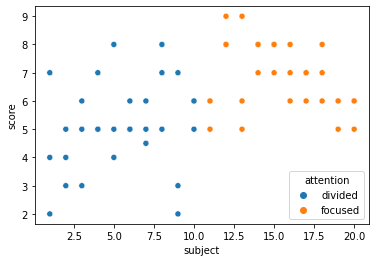

In [22]:
sns.scatterplot(x = "subject",y ="score",data=X,hue=y)

## Perception Trick:

In [23]:
def step (z):
    return  int(z > 0)

In [24]:
def perception (X,y,epoch=10000,lr_rate = 0.1,func = step):
    
    # Add the "Xo" to X
    X_new = X.copy()
    y_new = y.copy()
    Xo = pd.Series([1 for x in range(len(X_new.index))])
    X_new.insert(0,"Xo",Xo)
    
    # wts = [w0,w1,w2,....,wN]
    weights = np.ones(len(X_new.columns))
    
    for iter_ in range(epoch):
        # random X
        index = np.random.randint(0,X.shape[0])
        X_pt = np.array(X_new.iloc[index])
        y_pt = y_new[index]
        
        z_pt = np.dot(X_pt,weights)
        y_hat_pt = func(z_pt)
        
        weights = weights + lr_rate*(y_pt - y_hat_pt)*X_pt
    
    inter_ = weights[0]
    coeff_ = weights[1:]
    
    return inter_,coeff_

In [25]:
intercept_,coeff_ = perception(X,y_trf)

In [26]:
print("Intercept - ", intercept_)
print("Coefficient - ", coeff_)

Intercept -  -16.09999999999996
Coefficient -  [ 1.8 -0.6]


In [27]:
def get_line (intercept_,coeff_):
    m = -(coeff_[0]/coeff_[1])
    b = -(intercept_/coeff_[1])
    return m,b

In [28]:
def get_input (intercept_,coeff_,x_low=10,x_high=12,x_no_pt=100):
    m,b = get_line(intercept_,coeff_)
    x_input = np.linspace(x_low,x_high,x_no_pt)
    y_input = m*x_input + b
    return x_input,y_input

In [29]:
x_input,y_input = get_input(intercept_,coeff_)

## Sigmoid func. Impact

In [30]:
def sigmoid (z):
    return 1/(1 + np.exp(-z))

In [31]:
intercept_sg,coeff_sg = perception(X,y_trf,func = sigmoid)

In [32]:
x_input_sg,y_input_sg = get_input(intercept_sg,coeff_sg)

## Gradient Descent

In [45]:
def logistic (X,y,epoch=10000,lr_rate = 0.1):
    
    # Add the "Xo" to X
    X_new = X.copy()
    y_new = y.copy()
    Xo = pd.Series([1 for x in range(len(X_new.index))])
    X_new.insert(0,"Xo",Xo)
    
    # wts = [w0,w1,w2,....,wN]
    weights = np.ones(X_new.shape[1])
    
    for iter_ in range(epoch):
        z = np.dot(X_new,weights)
        y_hat = sigmoid(z)
        weights = weights + lr_rate*(np.dot((y-y_hat),X_new)/X_new.shape[0])

    inter_ = weights[0]
    coeff_ = weights[1:]
    
    return inter_,coeff_

In [55]:
intercept_gd,coeff_gd = logistic(X,y_trf,epoch=10000,lr_rate=0.1)
print("intercept = ", intercept_gd)
print("coefficients = ", coeff_gd)

intercept =  -13.077983920633455
coefficients =  [1.25648362 0.00235223]


In [97]:
x_input_gd,y_input_gd = get_input(intercept_gd,coeff_gd,x_low=10.38,x_high=10.41)

## Logistic Regression comp. !

In [33]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X,y_trf)

LogisticRegression()

In [34]:
x_input_log,y_input_log = get_input(log_reg.intercept_[0],log_reg.coef_[0])

## Visualize the diff. [perception & sigmoid]

<AxesSubplot:xlabel='subject', ylabel='score'>

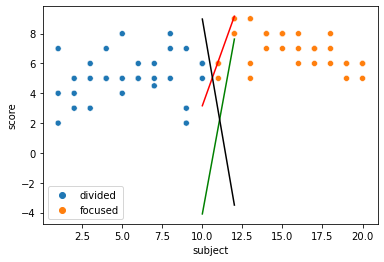

In [48]:
sns.scatterplot(x = "subject",y ="score",data=X,hue=y)
sns.lineplot(x = x_input,y = y_input,color='red')
sns.lineplot(x = x_input_sg,y = y_input_sg,color='green')
sns.lineplot(x = x_input_log,y = y_input_log,color='black')

## Logistic Regression comp. !!

In [105]:
from sklearn.linear_model import LogisticRegression
log_reg_basic = LogisticRegression()
log_reg_basic.fit(X,y_trf)

LogisticRegression()

In [106]:
x_input_log_b,y_input_log_b = get_input(log_reg_basic.intercept_[0],
                                        log_reg_basic.coef_[0])

## Visualize the diff. [Gradient Descent]

<AxesSubplot:xlabel='subject', ylabel='score'>

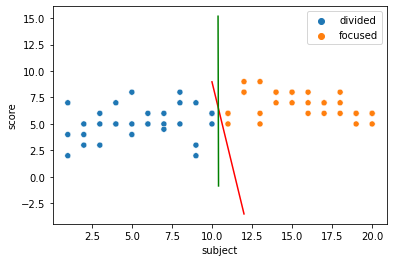

In [107]:
sns.scatterplot(x = "subject",y ="score",data=X,hue=y)
sns.lineplot(x = x_input_log_b,y = y_input_log_b,color='red')
sns.lineplot(x = x_input_gd,y = y_input_gd,color='green')